In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import json
import scipy.stats as st
from config import api_key
import time

In [3]:
#2015 Happiness dataframe
Happy_df_2015 = pd.read_csv("Resources/2015.csv")
Happy_df_2015 = Happy_df_2015.rename(columns={"Country or region" : "country"})
Happy_df_2015 = Happy_df_2015.rename(columns ={"Ladder score" : "Score", "Explained by: Log GDP per capita": "GDP per capita"})

#2016 Happiness dataframe
Happy_df_2016 = pd.read_csv("Resources/2016.csv")
Happy_df_2016 = Happy_df_2016.rename(columns={"Country or region" : "country"})
Happy_df_2016 = Happy_df_2016.rename(columns ={"Ladder score" : "Score", "Explained by: Log GDP per capita": "GDP per capita"})

#2017 Happiness dataframe
Happy_df_2017 = pd.read_csv("Resources/2017.csv")
Happy_df_2017 = Happy_df_2017.rename(columns={"Country or region" : "country"})
Happy_df_2017 = Happy_df_2017.rename(columns ={"Ladder score" : "Score", "Explained by: Log GDP per capita": "GDP per capita"})

#2018 Happiness dataframe
Happy_df_2018 = pd.read_csv("Resources/2018.csv")
Happy_df_2018 = Happy_df_2018.rename(columns={"Country or region" : "country"})
Happy_df_2018 = Happy_df_2018.rename(columns ={"Ladder score" : "Score", "Explained by: Log GDP per capita": "GDP per capita"})

#2019 Happiness dataframe
Happy_df = pd.read_csv("Resources/2019.csv")
Happy_df = Happy_df.rename(columns={"Country or region" : "country"})


#2020 Happiness dataframe
Happy_df_2020 = pd.read_csv("Resources/2020.csv")
Happy_df_2020 = Happy_df_2020.rename(columns={"Country or region" : "country"})
Happy_df_2020 = Happy_df_2020.rename(columns ={"Ladder score" : "Score", "Explained by: Log GDP per capita": "GDP per capita"})
Happy_df_2020
#countries and capital dataframe
Country_Cap_df = pd.read_csv("Resources/country-list.csv")


#Merging both data sets together
Merge_df = pd.merge(Happy_df,Country_Cap_df, on ="country")
Merge_df = Merge_df.drop(columns= "type")
Merge_df.head(100)

,Overall rank,country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,capital
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Helsinki
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Copenhagen
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Oslo
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Reykjavík
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Amsterdam
...,...,...,...,...,...,...,...,...,...,...
95,101,Jordan,4.906,0.837,1.225,0.815,0.383,0.110,0.130,Amman
96,102,Benin,4.883,0.393,0.437,0.397,0.349,0.175,0.082,Porto-Novo
97,104,Gabon,4.799,1.057,1.183,0.571,0.295,0.043,0.055,Libreville
98,105,Laos,4.796,0.764,1.030,0.551,0.547,0.266,0.164,Vientiane


The correlation between both factors in 2019 is 0.79
The correlation between both factors in 2020 is 0.78


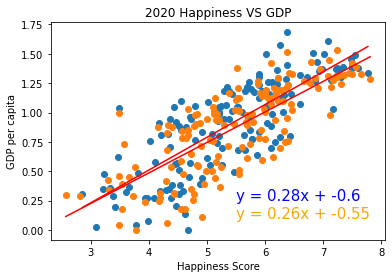

In [4]:
#Scatter graph Happiness versus GDP and get correlation for 2019
x_axis = Merge_df["Score"]
y_axis = Merge_df["GDP per capita"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Happiness Score")
plt.ylabel("GDP per capita")
plt.title ("2019 Happiness VS GDP")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.25),fontsize=15,color="blue")
correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors in 2019 is {round(correlation[0],2)}")

#Scatter graph Happiness versus GDP and get correlation for 2020
x_axis_2020 = Happy_df_2020["Score"]
y_axis_2020 = Happy_df_2020["GDP per capita"]
plt.scatter(x_axis_2020, y_axis_2020)
plt.xlabel("Happiness Score")
plt.ylabel("GDP per capita")
plt.title ("2020 Happiness VS GDP")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis_2020, y_axis_2020)
regress_values = x_axis_2020 * slope + intercept
line_eq_2020 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_2020,regress_values,"r-")
plt.annotate(line_eq_2020,(5.5,0.1),fontsize=15,color="orange")
correlation_2020 = st.pearsonr(x_axis_2020,y_axis_2020)
print(f"The correlation between both factors in 2020 is {round(correlation_2020[0],2)}")

plt.show()

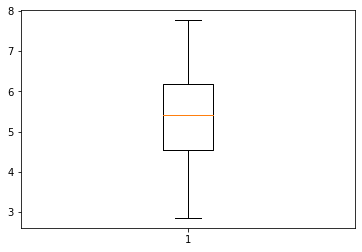

In [5]:
# box plot to dermine outliners on Happiness versus GDP
plt.boxplot(Merge_df["Score"])
#plt.boxplot(Happy_df_2020["Score"])
#plt.xlabel("Happiness Score")
#plt.ylabel("GDP per capita")
#plt.title ("Happiness VS GDP")
plt.show()